In [1]:
import dm_den_viz
import dm_den
import paths
from UCI_tools import cropper
import fitting
import lmfit
import pickle
import staudt_utils
import read_mcmc
import numpy as np
import pandas as pd
from importlib import reload
from IPython.display import display, Latex
from astropy import units as u, constants as c

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['axes.labelsize']=15.
rcParams['xtick.labelsize'] = 12.
rcParams['ytick.labelsize'] = 12.
rcParams['figure.dpi'] = 110.
rcParams['legend.fontsize'] = 15.

mls = 11. #marker label size
#result_figsize = (4.5,3.5) #figure size for the main result plots (rho & sigma)
result_figsize = (7.5, 4) #figure size for the main result plots (rho & sigma)

In [3]:
sigmoid_damped_eqnum = 5.7
mao_eqnum = None

In [4]:
reload(read_mcmc)
with open(paths.data + 'ls_results_raw.pkl', 'rb') as f:
    ls_results = pickle.load(f)
with open(paths.data + 'data_raw.pkl', 'rb') as f:
    oneD_fit_results = pickle.load(f)
results_mcmc = read_mcmc.estimate(
    'mcmc_samples_narrower_uniform_prior_20240606.h5',
    update_paper=True
)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

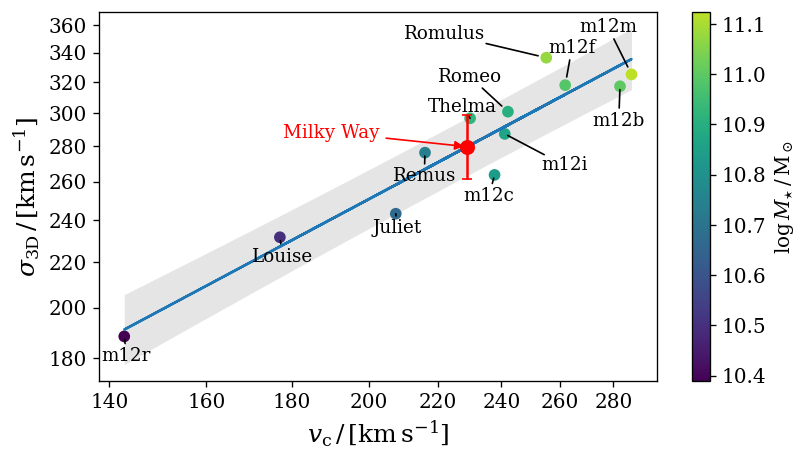

[array([[279.57467057]]), array([[19.14045017, 17.9801818 ]])]

In [5]:
reload(dm_den_viz)
dm_den_viz.plt_vs_vc(
     'disp_dm_disc_cyl', 
     source_fname = 'dm_stats_dz1.0_20230626.h5',
     tgt_fname='disp_vs_vphi.png',
     linear_dyfrac_data=oneD_fit_results['stdev_linear_dispdiff'],
     update_val=True,
     figsize=result_figsize, labelsize=mls, 
     adjust_text_kwargs={'force_static': (0.3, 3.),
                         'force_text': (0.4, 0.4),
                         #'force_explode': (0.09, 0.03)
                        },
     label_overrides={'Romulus': (2.1, 350., True),
                      'm12m': (2.67, 355., True),
                      'm12f': (2.56, 340., True),
                      'Romeo': (2.2, 320., True)
                     },
     dpi_show=120, 
     xtickspace=0.2, 
     ytickspace=20.,
     verbose=False, beta_sig=1.-0.682, 
     color='masses')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

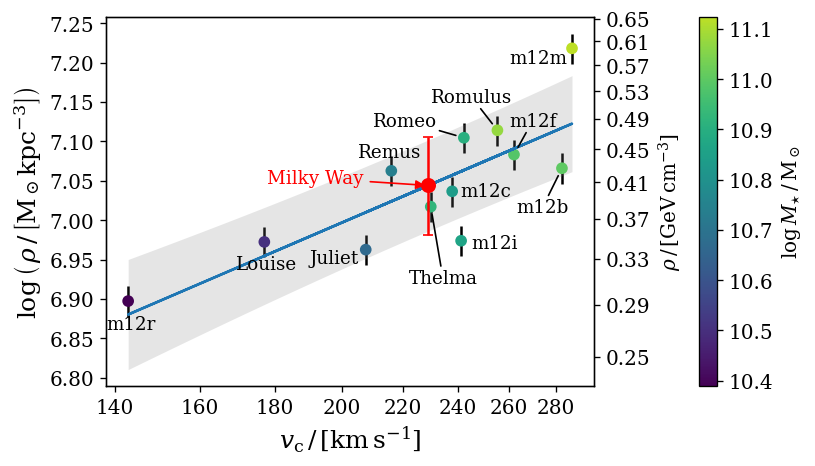

In [6]:
reload(dm_den_viz)
reload(dm_den)
reload(staudt_utils)
rho_hat = dm_den_viz.plt_vs_vc(
       'den_disc',
       source_fname = 'dm_stats_dz1.0_20230626.h5',
       tgt_fname='den_vs_vphi.png',
       linear_dyfrac_data=oneD_fit_results['stdev_linear_dendiff'],
       update_val=True,
       adjust_text_kwargs={'force_static': (0.8, 3.),
                           'force_text': (0.6, 0.6),
                           'force_explode': (0.1, 0.08),
                           'min_arrow_len': 35.
                          },
       label_overrides={'m12m': (2.6, 7.2, False),
                        'm12c': (2.41, 7.031, False),
                        'Thelma': (2.22, 6.92, True),
                        'm12i': (2.45, 6.965, False),
                        'Romulus': (2.3, 7.15, True),
                        'Juliet': (1.9, 6.945, False),
                        'm12b': (2.63, 7.01, True),
                        'Romeo': (2.1, 7.12, True),
                        'm12f': (2.6, 7.12, True)},
       figsize=result_figsize, labelsize=mls, 
       verbose=False,
       v0=dm_den_viz.vc_eilers,
       dv0=dm_den_viz.dvc_eilers,
       dpi_show=120,
       xtickspace=0.2, beta_sig=1.-0.682, 
       color='masses')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

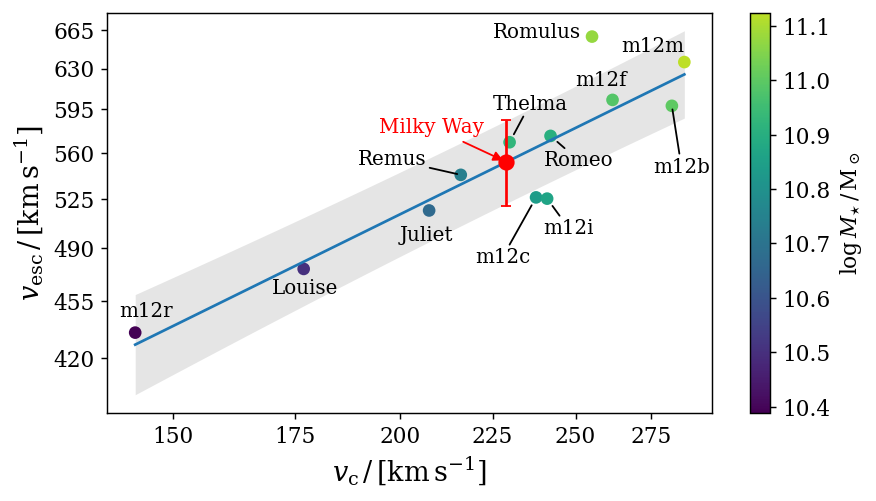

In [7]:
reload(dm_den_viz)
dm_den_viz.plt_vlim_vs_vc('dm_stats_dz1.0_20230724.h5', 
                             tgt_fname='vlim.png',
                             figsize=result_figsize,
                             adjust_text_kwargs={'force_static': (0.9, 0.9),
                                                 #'force_text': (0.5, 0.5),
                                                 'force_explode': (.5, .7),
                                                 #'explode_radius': 180,
                                                 #'min_arrow_len': 40.,
                                                 'force_pull': (0.01, 0.01)
                                                },
                              label_overrides={'Juliet': (200., 495, False),
                                               'm12r': (140., 445., False),
                                               'm12i': (240., 500., True),
                                               'm12c': (220., 480., True),
                                               'Thelma': (225., 595., True),
                                               #'m12b': (268., 573., False),
                                               'm12f': (250., 615., False),
                                               'm12m': (265., 645., False),
                                               'Romeo': (240., 550., True),
                                               'Romulus': (225., 658., False),
                                               'Louise': (170., 460., False)
                                              },
                             formula_y=-1., xtickspace=25., ytickspace=35.,
                             dpi_show=130.,
                             update_values=True, show_formula='outside',
                             show_vesc=False)

1.74 kpc arclength bins
11.08% max den diff
5.33% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

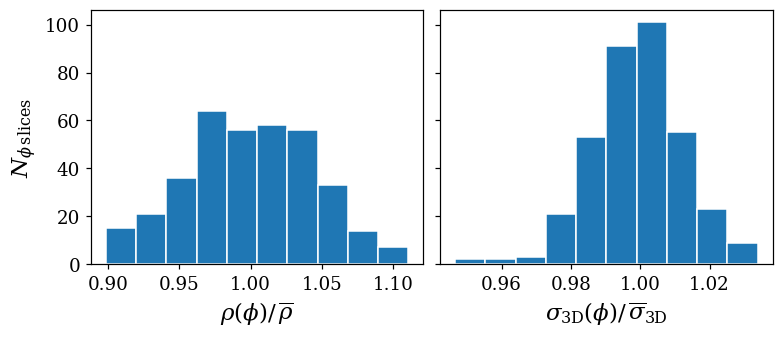

In [55]:
reload(dm_den_viz)
print('{0:0.2f} kpc arclength bins'.format(2.*np.pi*8.3/30.))
dm_den_viz.plt_disc_diffs('dm_stats_dz1.0_20230626.h5',
                          'den_disp_dict_N30_dz1.0_20240117.pkl',
                          only_linear=True, figsize=(8,3),
                          tgt_fname='disc_diffs.png',
                          update_val=True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

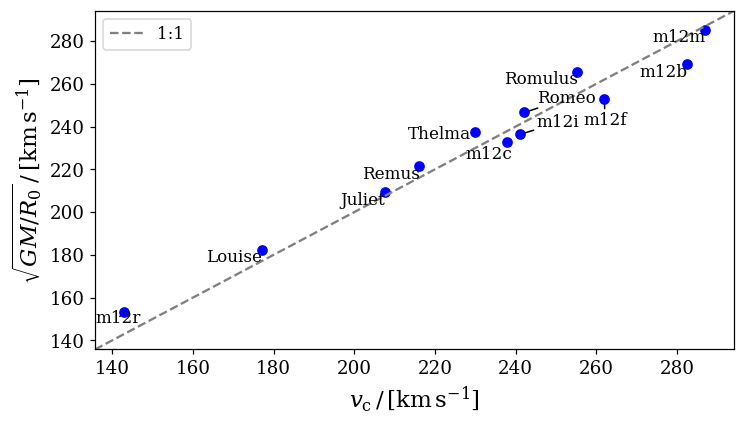

In [31]:
reload(dm_den_viz)
dm_den_viz.plt_gmr_vs_vc('dm_stats_dz1.0_20231211.h5',
                         tgt_fname='gmr_vs_vc.png', 
                         #figsize=(4.5,4), 
                         figsize=result_figsize,
                         adjust_text_kwargs={#'force_static': (.8, .8),
                                             #'force_text': (0.6, 0.6),
                                             #'force_explode': (5., 5.),
                                             #'min_arrow_len': 23.
                                            },
                         #label_overrides={'m12r': (2.15, 2.22, True),
                         #                 'Louise': (2.23, 2.3, True),
                         #                 'Remus': (2.278, 2.34, False),
                         #                 'Juliet': (2.33, 2.3, True),
                         #                 'm12i': (2.39, 2.36, False),
                         #                 'm12f': (2.42, 2.388, False),
                         #                 'm12m': (2.41, 2.46, False)}
                        )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

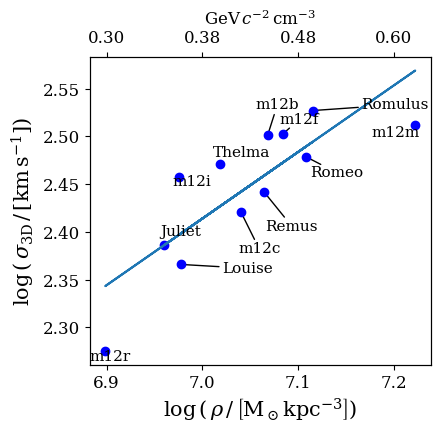

In [9]:
_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                   'den_disc', 'disp_dm_disc_cyl',
                   dm_den_viz.den_label, dm_den_viz.disp_label,
                   'log', 'log', dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'force_static':(1.7, 1.7),
                                       'force_explode':(0.05,0.3),
                                       'min_arrow_len':10.},
                   labelsize=mls, show_formula='outside',
                   tgt_fname='disp_vs_den.png',
                   #ax_slr_kwargs={'prediction_x':[[dm_den_viz.rho_sofu],
                   #                               10.**rho_hat[0][0]],
                   #               'dX':[[dm_den_viz.drho_sofu],
                   #                      rho_hat[1][0] \
                   #                      *np.sqrt(10.**(rho_hat[0][0][0]*2.) \
                   #                               * np.log(10.)**2.)]}
                      )
# The extra math on the error bar from my prediction is to get the
# log error bar into a linear error bar that the program will then
# convert back into the original error bar. (The program expects linear
# error bars, even though it might display log error bars in the end.)

#print(_)

In [10]:
df = dm_den.load_data('dm_stats_dz1.0_20230626.h5').drop(['m12w', 'm12z'])
cor_df = df \
    [['disp_dm_disc_cyl',
      'den_disc',
      'v_dot_phihat_disc(T<=1e3)',
      'vcirc']] \
    .rename(columns={'disp_dm_disc_cyl': '$\sigma_\mathrm{3D}$', 
                     'den_disc': '$\rho$',
                     'v_dot_phihat_disc(T<=1e3)': '$v_c$',
                     'vcirc': '$\sqrt{Gm/R_0}$'}) \
    .corr()
for i in range(cor_df.shape[0]):
    for j in range(cor_df.shape[1]):
        if j>i:
            cor_df.iloc[i,j] = ''
caption = 'Correlations between the four variables of interest'
with open(paths.tables+'corr.tex','w') as tf:
    l = cor_df.to_latex(escape=False,
                        float_format='{:0.2f}'.format,
                        caption=caption,
                        label='table:corr')
    tf.write(l)
cor_df

/var/folders/94/r7q1ltfd5cdf55qhtt067d380000gn/T/ipykernel_3749/3455581519.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  l = cor_df.to_latex(escape=False,


,$\sigma_\mathrm{3D}$,$\rho$,$v_c$,$\sqrt{Gm/R_0}$
$\sigma_\mathrm{3D}$,1.000000,,,
$\rho$,0.787835,1.0,,
$v_c$,0.933800,0.787627,1.0,
$\sqrt{Gm/R_0}$,0.964623,0.833963,0.986555,1.0


100% |##############################################################################################################################################################################################|


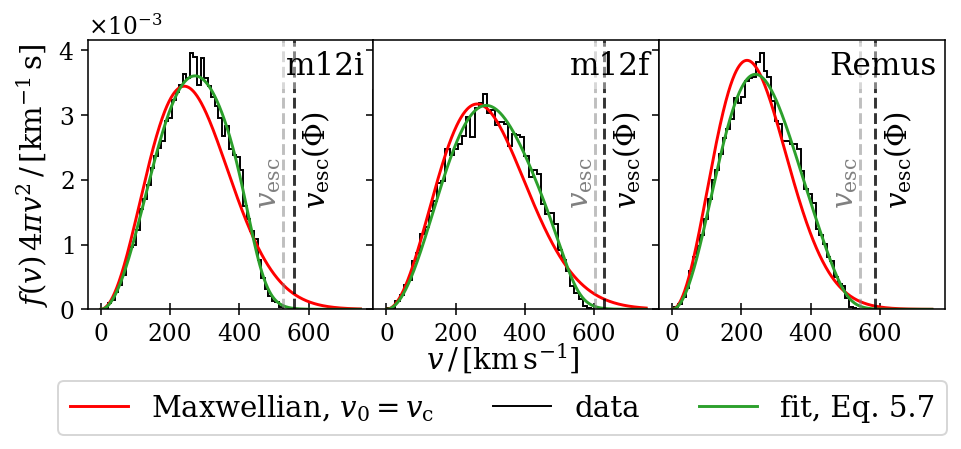

{'m12i': 449.47111963173415,
 'm12f': 536.5898066872419,
 'Remus': 494.39430949627166}

In [16]:
reload(fitting)
reload(dm_den_viz)
fitting.fit_vdamp(
    df_source='dm_stats_dz1.0_20230724.h5',
    k_source='results_mcmc.pkl',
    gals=['m12i', 'm12f', 'Remus'],
    tgt_fname='naive_vs_fit.png', 
    vcut_type='lim',
    show_max=True,
    show_max_fit=False,
    show_mao_fixed=False,
    show_mao_free=False,
    sigmoid_damped_eqnum=sigmoid_damped_eqnum,
    show_rms=False, show_resids=False,
    xtickspace=200.
)

100% |##############################################################################################################################################################################################|


Done plotting galaxies. Finalizing figure.


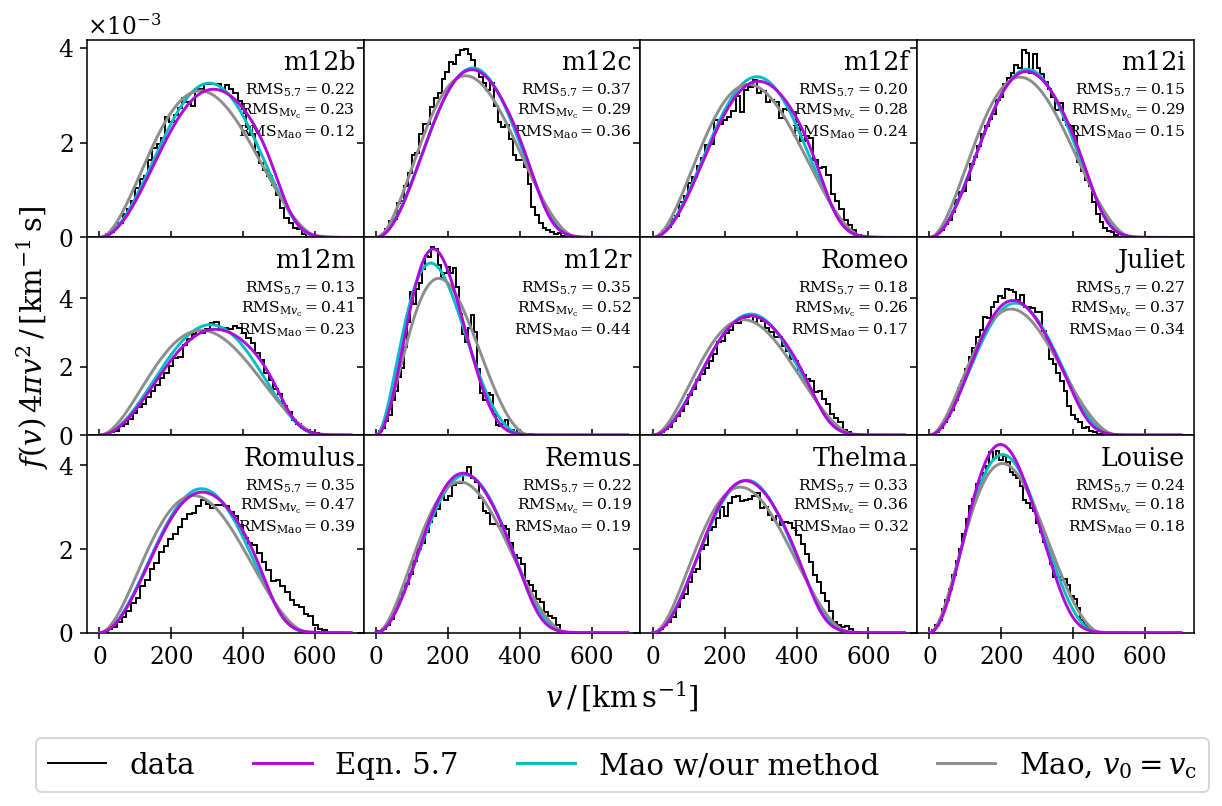

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [17]:
reload(dm_den_viz)
reload(fitting)
dm_den_viz.plt_universal_prefit_with_mcmc(
    results_mcmc,
    mao_ours_result_fname='mcmc_mao_ours_results.pkl',
    mao_naive_result_fname='results_mcmc_mao_naive.pkl',
    df_source='dm_stats_dz1.0_20230724.h5',
    distrib_samples_fname=None,
    gals='discs',
    tgt_path=paths.figures+'mao_comparison.png', 
    xtickspace=200.,
    show_bands=False,
    show_mao_prediction=True, 
    show_mao_naive=True,
    show_sigmoid_hard=False, 
    show_sigmoid_exp=False,
    show_rms=True, scale='linear', 
    prediction_vcut_type='lim_fit',
    std_vcut_type='lim_fit',
    sigmoid_damped_eqnum=sigmoid_damped_eqnum,
    mao_eqnum=mao_eqnum
)

100% |########################################################################################################################################################################################################|


Done plotting galaxies. Finalizing figure.


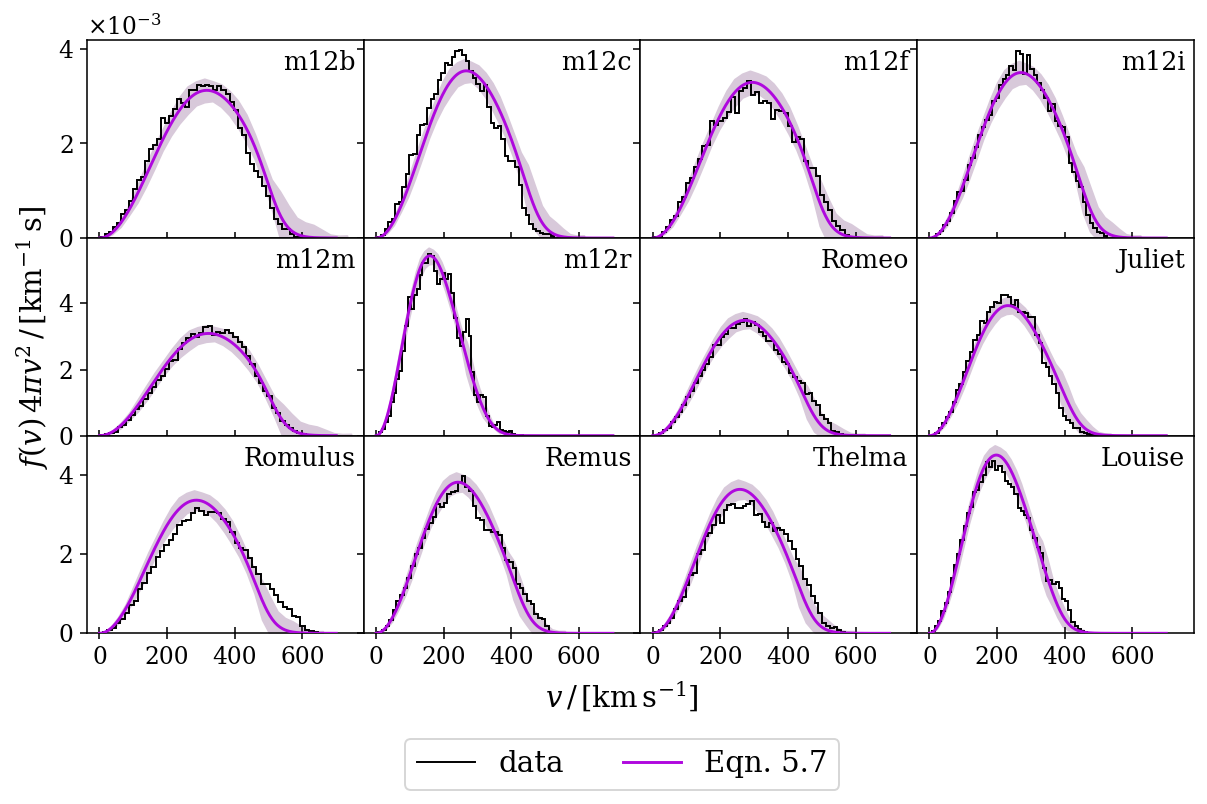

In [76]:
reload(dm_den_viz)
reload(fitting)
dm_den_viz.plt_universal_prefit(
    results_mcmc, 
    df_source='dm_stats_dz1.0_20230724.h5',
    distrib_samples_fname=('mcmc_distrib_samples'
                           '_by_v0_20240702'
                           '(narrower_uniform_prior_20240606).h5'),
    xtickspace=200.,
    tgt_path=paths.figures + 'univ_fit_all.png',
    show_mao_prediction=False,
    prediction_vcut_type=None,
    sigmoid_damped_eqnum=sigmoid_damped_eqnum)

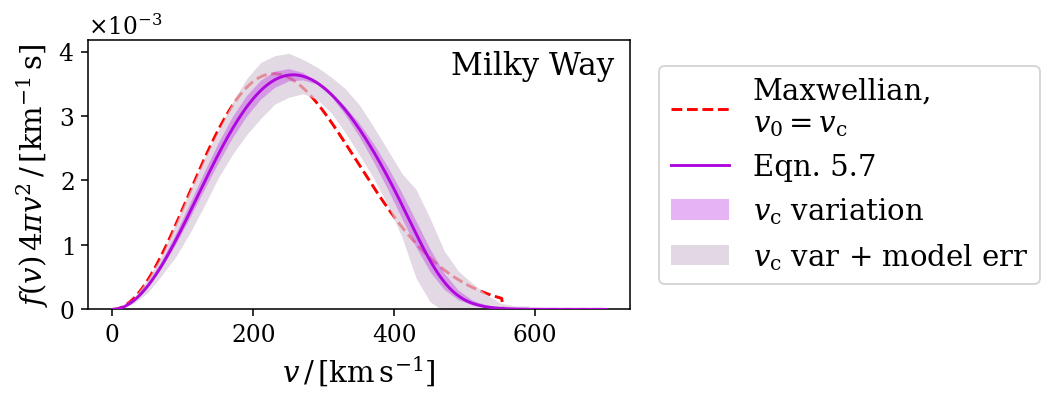

In [91]:
%matplotlib inline
reload(fitting)
reload(dm_den_viz)
dm_den_viz.plt_mw(
    'dm_stats_dz1.0_20240607.h5',
    vcut_type='lim_fit',
    fit_results_fname='results_mcmc.pkl',
    dvc=dm_den_viz.dvc_eilers,
    tgt_fname='distrib_mw.png', 
    dpi=140, show_vcrit=False,
    sigmoid_damped_eqnum=sigmoid_damped_eqnum
)

/Users/patrick/sliding_into_dm_code/dm_den_viz.py:4143: RuntimeWarning: invalid value encountered in true_divide
  vmins, (gs_sigmoid_damped_hard / gs_max_hard),


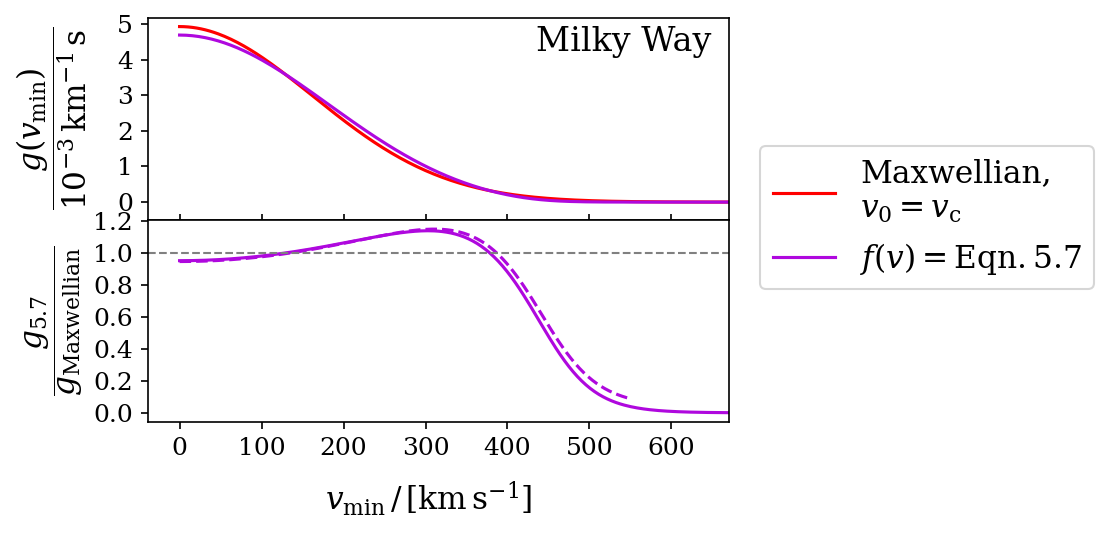

In [30]:
reload(dm_den_viz)
dm_den_viz.plt_halo_integral_mw_with_ratio(
    'dm_stats_dz1.0_20230724.h5',
    'results_mcmc.pkl',
    tgt_fname='halo_integral_mw.png',
    xtickspace=100.,
    sigmoid_damped_eqnum=sigmoid_damped_eqnum
)

Plotting each galaxy.


100% |##############################################################################################################################################################################################|


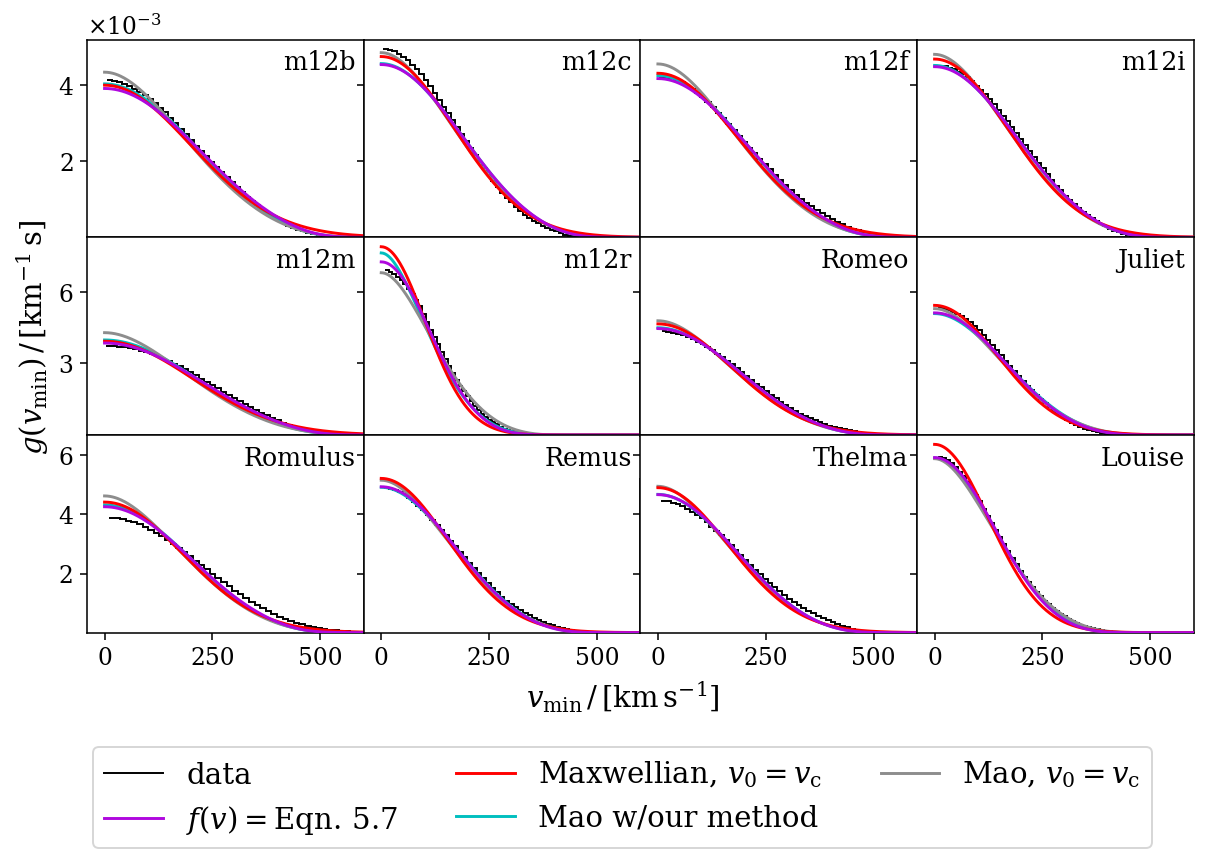

In [22]:
reload(dm_den_viz)
reload(fitting)
dm_den_viz.plt_halo_integrals_with_mcmc(
    'discs', 
    df_source='dm_stats_dz1.0_20230724.h5',
    sigmoid_damped_fit_fname='results_mcmc.pkl',
    mao_ours_fit_fname='mcmc_mao_ours_results.pkl',
    mao_naive_fit_fname='results_mcmc_mao_naive.pkl',
    scale='linear',
    prediction_vcut_type='lim_fit',
    std_vcut_type='lim_fit',
    show_sigmoid_hard=False,
    show_max_hard=False,
    show_std_vcut=False, show_prediction_vcut=False,
    show_mao_prediction=True, 
    show_mao_naive=True,
    xmax=600., xtickspace=250.,
    tgt_fname='halo_integrals_all.png',
    sigmoid_damped_eqnum=sigmoid_damped_eqnum
)

,fsuffix,fsuffix_cropped,res,host_key,mass_class,den_disc,f_disc,disp_dm_disc_cyl,disp_dm_shell_cyl,v_dot_phihat_disc(T<=1e4),...,f_shell,vcirc,mwithin10,vesc,$\sigma_z/\sigma_r$,$\sigma_\phi/\sigma_r$,$\sigma_z/\sigma_\phi$,$\beta$,$\beta_\phi$,$\beta_z$
m12b,b,b,7100,host.index,12,1.164282e+07,0.858898,317.047582,311.367420,282.519196,...,0.994396,269.145655,6.919605e+10,614.931925,0.925035,0.929079,0.995647,0.140562,0.136812,0.144311
m12c,c,c,7100,host.index,12,1.088321e+07,0.918846,263.634356,262.190740,237.778194,...,1.268284,232.900773,5.378084e+10,567.311214,0.802129,0.892094,0.899153,0.280379,0.204169,0.356589
m12f,f,f,7100,host.index,12,1.211730e+07,0.825267,317.781462,313.050024,262.016718,...,1.020240,252.764903,6.562972e+10,629.419580,0.879955,0.925409,0.950883,0.184648,0.143618,0.225678
m12i,i,i,7100,host.index,12,9.419765e+06,1.061598,287.120931,280.495128,241.137580,...,1.285352,236.372064,5.243659e+10,556.785436,0.886652,0.975785,0.908655,0.130847,0.047844,0.213849
m12m,m,m,7100,host.index,12,1.652878e+07,0.605005,324.962051,321.557934,287.022026,...,0.890467,285.224524,7.244051e+10,665.536171,0.881225,0.971429,0.907143,0.139885,0.056326,0.223443
m12r,r,r,7100,host.index,12,7.897092e+06,1.266289,188.379166,188.423635,142.938490,...,1.773422,153.128793,3.604036e+10,453.105416,0.859943,0.989774,0.868828,0.140422,0.020347,0.260497
Romeo,_elvis_RomeoJuliet,_elvis_Romeo,3500,host.index,12,1.272817e+07,0.785659,300.710739,298.250291,242.183933,...,1.004627,246.621887,7.151809e+10,624.548868,0.887450,0.938976,0.945125,0.165378,0.118324,0.212433
Juliet,_elvis_RomeoJuliet,_elvis_Juliet,3500,host2.index,12,9.178256e+06,1.089532,243.178162,239.041004,207.588269,...,1.318026,209.297992,5.341592e+10,545.464175,0.902678,0.967994,0.932524,0.124080,0.062987,0.185173
Romulus,_elvis_RomulusRemus,_elvis_Romulus,4000,host.index,12,1.300826e+07,0.768742,336.462890,335.295400,255.284988,...,1.000534,265.639159,7.041675e+10,697.542556,0.924923,1.038630,0.890523,0.032883,-0.078751,0.144517
Remus,_elvis_RomulusRemus,_elvis_Remus,4000,host2.index,12,1.155609e+07,0.865345,276.134763,273.502715,216.100983,...,1.100078,221.469325,6.271868e+10,585.886787,0.819257,0.893035,0.917385,0.265654,0.202489,0.328819


fraction(beta < 0.25) = 0.6667


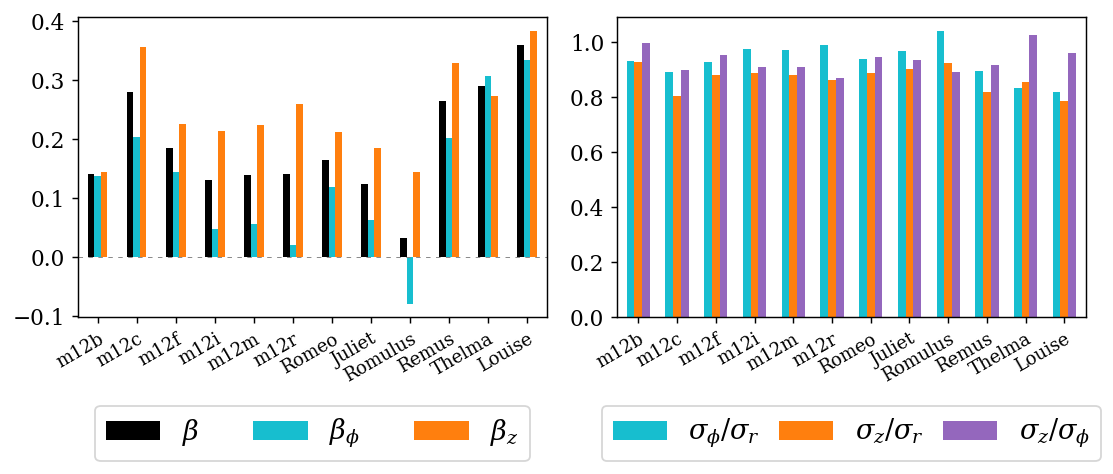

In [22]:
from importlib import reload
reload(dm_den_viz)
dm_den_viz.plt_anisotropy('dm_stats_dz1.0_20231211.h5', vertical=False,
                          xticklabel_fontsize=10., figsize=(10., 3.),
                          savefig=True)